# Pandas Practice Worksheet: From Data Frames to Feature Engineering (Part 2)

## Section 5: Data Cleaning (Continued)

### 31. Create a new DataFrame `df_dropped_rows` by dropping all rows that contain any missing values.

In [1]:
import pandas as pd

df = pd.read_csv(r"datasets/Titanic-Dataset.csv")

df_dropped_rows = df.dropna()
df_dropped_rows.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


### 32. Create a new DataFrame `df_dropped_cols` by dropping all columns that contain any missing values. (What column(s) disappeared?)

In [2]:
df_dropped_cols = df.dropna(axis='columns')

In [3]:
prev_cols = list(df_dropped_rows.columns)
curr_cols = list(df_dropped_cols.columns)
print("Columns Disappeared : ",[i for i in prev_cols if i not in curr_cols])

Columns Disappeared :  ['Age', 'Cabin', 'Embarked']


### 33. Fill Missing 'Age': Create a new column `Age_filled`.
  First, calculate the mean age for the entire 'Age' column.

In [4]:
mean_age = int(df["Age"].mean())
print("Mean Age : ",mean_age)
df["Age_filled"] = df["Age"].fillna(mean_age)
df.tail()

Mean Age :  29


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,29.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,26.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,32.0


### 34. Fill Missing 'Embarked':
  First, find the mode (most common value) of the 'Embarked' column.

**Hint:** Use `.fillna()` to fill the missing 'Embarked' values with this mode. Do this "in-place" on the `df` DataFrame.

In [5]:
mode_embarked = df["Embarked"].mode()
print("Mode of Embarked : ",mode_embarked[0])
df["Embarked"] = df["Embarked"].fillna(mode_embarked[0])
df.tail()

Mode of Embarked :  S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,29.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,26.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,32.0


### 35. Check for duplicate rows in `df`. Are there any?

In [6]:
df.duplicated().unique() #False means there's no duplicate rows

array([False])

### 36. Drop any duplicate rows from `df` (if any exist).

In [7]:
df = df.drop_duplicates()

## Section 6: Data Manipulation & Operations

### 37. Rename Columns: Rename the 'Sex' column to 'Gender' and 'Name' to 'Full_Name'.

In [8]:
df.rename(columns={'Sex': 'Gender', 'Name': 'Full_Name'}, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Full_Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


### 38. Create New Column: Create a new column called `FamilySize` by adding the 'SibSp' and 'Parch' columns together.

In [9]:
df["FamilySize"] = df["SibSp"] + df["Parch"]
df.tail()

,PassengerId,Survived,Pclass,Full_Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled,FamilySize
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,27.0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,19.0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,29.0,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,26.0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,32.0,0


### 39. `.apply()` with Lambda: Create a new column `IsAdult` that is 'Yes' if 'Age' > 18 and 'No' otherwise.

**Hint:** `df['Age'].apply(lambda x: ...)`

In [10]:
df['IsAdult'] = df['Age_filled'].apply(lambda x: 'Yes' if x > 18 else 'No')
df.head()

,PassengerId,Survived,Pclass,Full_Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled,FamilySize,IsAdult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1,Yes
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,1,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,1,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,0,Yes


### 40. `.map()`: Create a new column `Sex_binary` that maps 'male' to 0 and 'female' to 1.

**Hint:** `df['Sex'].map({'male': 0, 'female': 1})`

In [11]:
df["Sex_binary"] = df['Gender'].map({'male':0,'female':1})
df.head()

,PassengerId,Survived,Pclass,Full_Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled,FamilySize,IsAdult,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1,Yes,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,1,Yes,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0,Yes,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,1,Yes,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,0,Yes,0


### 41. Find the 10 most expensive 'Fare' prices.

**Hint:** `sort_values()` and `head()`

In [12]:
df['Fare'].sort_values(ascending=False,na_position='last').head(1)

258    512.3292
Name: Fare, dtype: float64

### 42. String Operations: Find the unique titles (Mr., Mrs., Miss., etc.) from the 'Name' column.

In [13]:
titles = df['Full_Name'].str.extract(r',\s*([^\.]+)\.')[0].unique()
print("Unique Titles:", titles)

Unique Titles: ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


### 43. Replace all 'male'/'female' values in the 'Sex' column with 'M'/'F'.

In [14]:
df['Gender'] = df['Gender'].map({'male':'M','female':'F'})
df.head()

,PassengerId,Survived,Pclass,Full_Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled,FamilySize,IsAdult,Sex_binary
0,1,0,3,"Braund, Mr. Owen Harris",M,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,1,Yes,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.0,1,0,PC 17599,71.2833,C85,C,38.0,1,Yes,1
2,3,1,3,"Heikkinen, Miss. Laina",F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,0,Yes,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.0,1,0,113803,53.1000,C123,S,35.0,1,Yes,1
4,5,0,3,"Allen, Mr. William Henry",M,35.0,0,0,373450,8.0500,NaN,S,35.0,0,Yes,0


### 44. Drop Columns: Create a new DataFrame `df_ml` by dropping the original 'Name', 'Ticket', and 'Cabin' columns, as they are hard to use in a model.

In [15]:
df_ml = df.drop(columns=['Full_Name', 'Ticket', 'Cabin'])
df_ml.head()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked,Age_filled,FamilySize,IsAdult,Sex_binary
0,1,0,3,M,22.0,1,0,7.2500,S,22.0,1,Yes,0
1,2,1,1,F,38.0,1,0,71.2833,C,38.0,1,Yes,1
2,3,1,3,F,26.0,0,0,7.9250,S,26.0,0,Yes,1
3,4,1,1,F,35.0,1,0,53.1000,S,35.0,1,Yes,1
4,5,0,3,M,35.0,0,0,8.0500,S,35.0,0,Yes,0


## Section 7: Grouping & Aggregation

### 45. `groupby()`: Group the DataFrame by 'Sex' and find the mean 'Survived' rate for each.

In [16]:
mean_srv_rate = df_ml.groupby('Gender')['Survived'].mean()
print(mean_srv_rate.apply(lambda x: f"{x:.2%}"))

Gender
F    74.20%
M    18.89%
Name: Survived, dtype: object


### 46. `groupby()`: Group by 'Pclass' and find the mean 'Fare' and mean 'Age' for each class.

In [17]:
df_ml.groupby('Pclass')[['Fare','Age']].mean()

,Fare,Age
Pclass,,
1,84.154687,38.233441
2,20.662183,29.877630
3,13.675550,25.140620


### 47. Multi-level `groupby()`: Group by both 'Pclass' and 'Sex'. Find the median 'Age' for each combination.

In [18]:
df_ml.groupby(['Pclass','Gender'])['Age'].median()

Pclass  Gender
1       F         35.0
        M         40.0
2       F         28.0
        M         30.0
3       F         21.5
        M         25.0
Name: Age, dtype: float64

### 48. `.agg()`: Group by 'Pclass' and find:
  The mean of 'Fare'.
  The max of 'Age'.
  The count of 'Survived'.

**Hint:** Use `df.groupby('Pclass').agg({'Fare': 'mean', 'Age': 'max', 'Survived': 'count'})`.

In [19]:
df_ml.groupby('Pclass').agg({'Fare': 'mean', 'Age': 'max', 'Survived': 'count'})

,Fare,Age,Survived
Pclass,,,
1,84.154687,80.0,216
2,20.662183,70.0,184
3,13.675550,74.0,491


### 49. Find the number of passengers in each 'Embarked' location.

**Hint:** Use `.value_counts()`.

In [20]:
df_ml['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

### 50. Find the average 'FamilySize' for people who survived vs. people who did not survive.

In [21]:
df_ml.groupby('Survived')['FamilySize'].mean()

Survived
0    0.883424
1    0.938596
Name: FamilySize, dtype: float64

### 51. What was the maximum 'Fare' paid by a passenger in each 'Pclass'?

In [22]:
df_ml.groupby('Pclass')['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

## Section 8: Merging & Joining

### 52. Create Data: Create two new, small DataFrames.
  `df1: {'student_id': ['s1', 's2', 's3'], 'name': ['Alice', 'Bob', 'Charlie']}`
  `df2: {'student_id': ['s2', 's3', 's4'], 'grade': ['A', 'B', 'C']}`

In [23]:
import pandas as pd
df1 = pd.DataFrame({'student_id': ['s1', 's2', 's3'], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'student_id': ['s2', 's3', 's4'], 'grade': ['A', 'B', 'C']})

### 53. `pd.concat()` (Vertical): Stack `df1` and `df2` on top of each other. What happens to the indices?

In [24]:
pd.concat([df1,df2])

,student_id,name,grade
0,s1,Alice,NaN
1,s2,Bob,NaN
2,s3,Charlie,NaN
0,s2,NaN,A
1,s3,NaN,B
2,s4,NaN,C


### 54. `pd.merge()` (Inner Join): Merge `df1` and `df2` on the 'student_id' column. (Only 's2' and 's3' should appear).

In [25]:
pd.merge(df1, df2, how='inner', on='student_id')

,student_id,name,grade
0,s2,Bob,A
1,s3,Charlie,B


### 55. `pd.merge()` (Outer Join): Merge `df1` and `df2` on 'student_id' using an 'outer' join. (s1, s2, s3, and s4 should all appear).

In [26]:
pd.merge(df1, df2, how='outer', on='student_id')

,student_id,name,grade
0,s1,Alice,NaN
1,s2,Bob,A
2,s3,Charlie,B
3,s4,NaN,C


### 56. `pd.merge()` (Left Join): Merge `df1` and `df2` using a 'left' join (with `df1` as the left).

In [27]:
pd.merge(df1, df2, how='left')

,student_id,name,grade
0,s1,Alice,NaN
1,s2,Bob,A
2,s3,Charlie,B


### 57. Create Data: Create a third DataFrame.
  `df3: {'teacher': ['Mr. Smith', 'Ms. Jones', 'Mr. White'], 'course': ['Math', 'History', 'Science']}`
  Set the index of `df3` to `['s1', 's2', 's3']`.

In [28]:
df3 = pd.DataFrame({'teacher': ['Mr. Smith', 'Ms. Jones', 'Mr. White'], 'course': ['Math', 'History', 'Science']}, index=['s1', 's2', 's3'])
df3

,teacher,course
s1,Mr. Smith,Math
s2,Ms. Jones,History
s3,Mr. White,Science


### 58. `.join()`: Use `.join()` to combine `df1` (with 'student_id' as its index) and `df3`. 

**Hint:** You'll need to `set_index('student_id')` on `df1` first.

In [29]:
df1.set_index('student_id').join(df3)

,name,teacher,course
student_id,,,
s1,Alice,Mr. Smith,Math
s2,Bob,Ms. Jones,History
s3,Charlie,Mr. White,Science


## Section 9: ML Preprocessing (Final Tasks)

### 59. `pd.get_dummies()`: One-Hot Encoding. Create a new DataFrame `df_embarked_dummies` by applying one-hot encoding to the 'Embarked' column.

In [30]:
df_embarked_dummies = pd.get_dummies(df_ml)
df_embarked_dummies.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_filled,FamilySize,Sex_binary,Gender_F,Gender_M,Embarked_C,Embarked_Q,Embarked_S,IsAdult_No,IsAdult_Yes
0,1,0,3,22.0,1,0,7.2500,22.0,1,0,False,True,False,False,True,False,True
1,2,1,1,38.0,1,0,71.2833,38.0,1,1,True,False,True,False,False,False,True
2,3,1,3,26.0,0,0,7.9250,26.0,0,1,True,False,False,False,True,False,True
3,4,1,1,35.0,1,0,53.1000,35.0,1,1,True,False,False,False,True,False,True
4,5,0,3,35.0,0,0,8.0500,35.0,0,0,False,True,False,False,True,False,True


### 60. `pd.cut()`: Binning. Discretize the 'Age' column into 5 equal-width bins.

**Hint:** Use `pd.cut(df['Age'], bins=5)`. Use `.value_counts()` to see how many passengers fall into each age bin.

In [31]:
pd.cut(df_ml['Age'], bins = 5).value_counts().sort_index()

Age
(0.34, 16.336]      100
(16.336, 32.252]    346
(32.252, 48.168]    188
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: count, dtype: int64

### Same thing plotted as bar graph

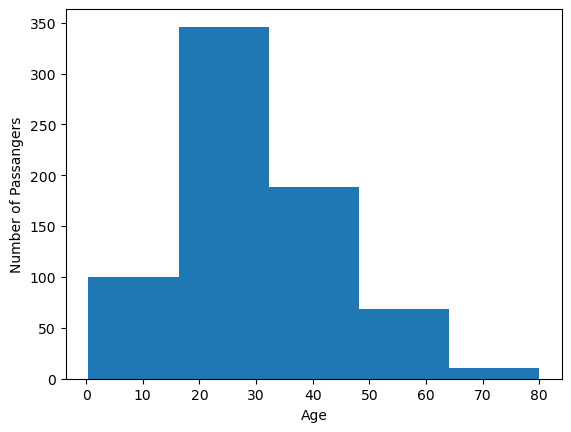

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df['Age'],bins = 5)
plt.xlabel("Age")
plt.ylabel("Number of Passangers")
plt.show()

### 61. `pd.qcut()`: Quantile Binning. Discretize the 'Fare' column into 4 bins with an equal number of people in each (quantiles).

**Hint:** Use `pd.qcut(df['Fare'], q=4)`. Use `.value_counts()` to see the counts. (They should be roughly equal).

In [33]:
pd.qcut(df_ml['Fare'],q=4).value_counts()

Fare
(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: count, dtype: int64

### 62. Combine tasks: Create a final, clean DataFrame `final_df` by:
  Starting with the `titanic_df`.
  Dropping 'Name', 'Ticket', 'Cabin'.
  Filling missing 'Age' with the mean.
  Filling missing 'Embarked' with the mode.
  Creating the `FamilySize`, `Sex_binary`, and `IsAdult` columns.
  Merging the `df_embarked_dummies` (from Q59) back onto the `final_df`.
  Dropping the original 'Sex', 'Embarked', 'SibSp', and 'Parch' columns.

In [34]:
import pandas as pd

df = pd.read_csv(r"datasets/Titanic-Dataset.csv")

final_df = df.drop(columns=['Name','Ticket','Cabin'])

final_df['Age'] = final_df['Age'].fillna(df['Age'].mean())
embarked_mode = df['Embarked'].mode()
final_df['Embarked'] = final_df['Embarked'].fillna(embarked_mode)

final_df['FamilySize'] = final_df['SibSp'] + final_df['Parch']

final_df['Sex_binary'] = final_df['Sex'].map({'male':0, 'female':1})

final_df['Is_Adult'] = final_df['Age'].apply(lambda x: 'Yes' if x >= 18 else 'No')

final_df = pd.get_dummies(final_df)
final_df.drop(columns=['SibSp', 'Parch'],inplace=True)
final_df.head()


,PassengerId,Survived,Pclass,Age,Fare,FamilySize,Sex_binary,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Is_Adult_No,Is_Adult_Yes
0,1,0,3,22.0,7.2500,1,0,False,True,False,False,True,False,True
1,2,1,1,38.0,71.2833,1,1,True,False,True,False,False,False,True
2,3,1,3,26.0,7.9250,0,1,True,False,False,False,True,False,True
3,4,1,1,35.0,53.1000,1,1,True,False,False,False,True,False,True
4,5,0,3,35.0,8.0500,0,0,False,True,False,False,True,False,True


## Section 10: Saving Your Work

### 63. Save to CSV: Save your `final_df` to a new file named `titanic_cleaned.csv`. Make sure not to save the pandas index.

**Hint:** `index=False`

In [35]:
final_df.to_csv(r"datasets/titanic_cleaned.csv",index=False)